# Census Income Project

In [43]:
#Importing Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [44]:
df=pd.read_csv('census_income.csv')
print(df)

       Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divor

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [46]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [47]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [48]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

As per the observation : 

1.There are 32560 data.

2.Both categorical and numerical data 3.There is no missing values.

In [49]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

In [50]:
numeric_data

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


1.Age,Hours_per_week are self explanatory.

2.fnlwgt:final weight 3.Education_num:No of years of education in total.

# Data Visualization:

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>],
       [<AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>],
       [<AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>]], dtype=object)

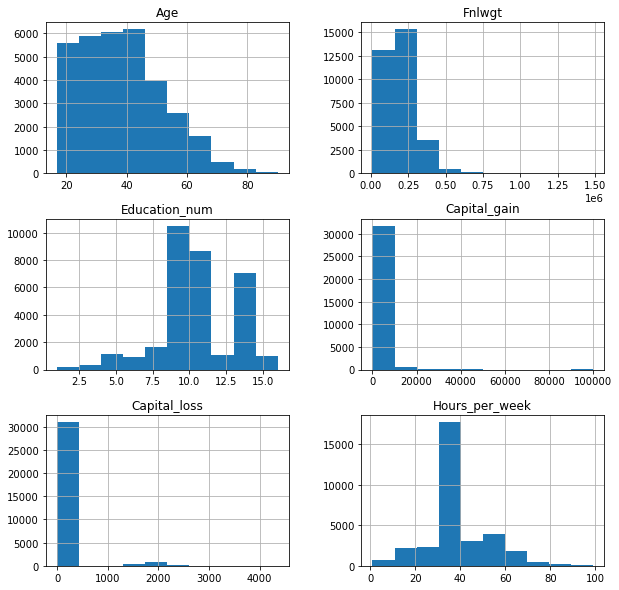

In [51]:
numeric_data.hist(figsize=(10,10))

from the observations: 1:People age of 40-45 are more 2:fnlwght is more in between 0.20 to 0.30 3:Almost the education is more around 8-9 years 4:hours_per_week are more in 30hours

And the data is not normalized so scaling is required.

<AxesSubplot:xlabel='count', ylabel='Workclass'>

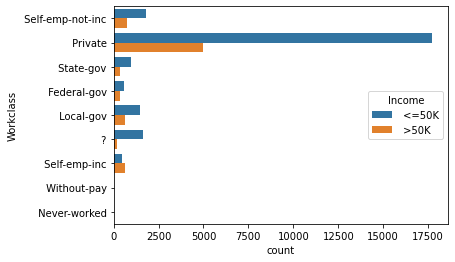

In [52]:
sns.countplot(y='Workclass', hue='Income', data = categorical_data)

As per the graph private employees who earn more than 50k and less than 50K

<AxesSubplot:xlabel='count', ylabel='Sex'>

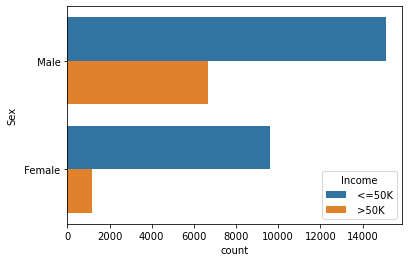

In [53]:
sns.countplot(y='Sex', hue='Income', data = categorical_data)

Male people are 14000 who are above 50k salary Female people are 9900 who are above 50k salary

# DATA VISUALIZATION

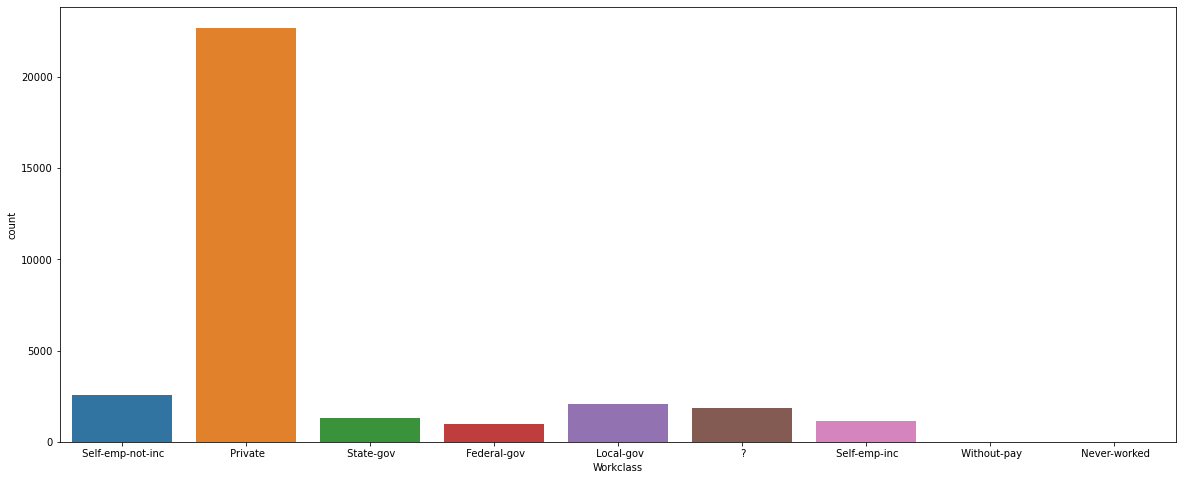

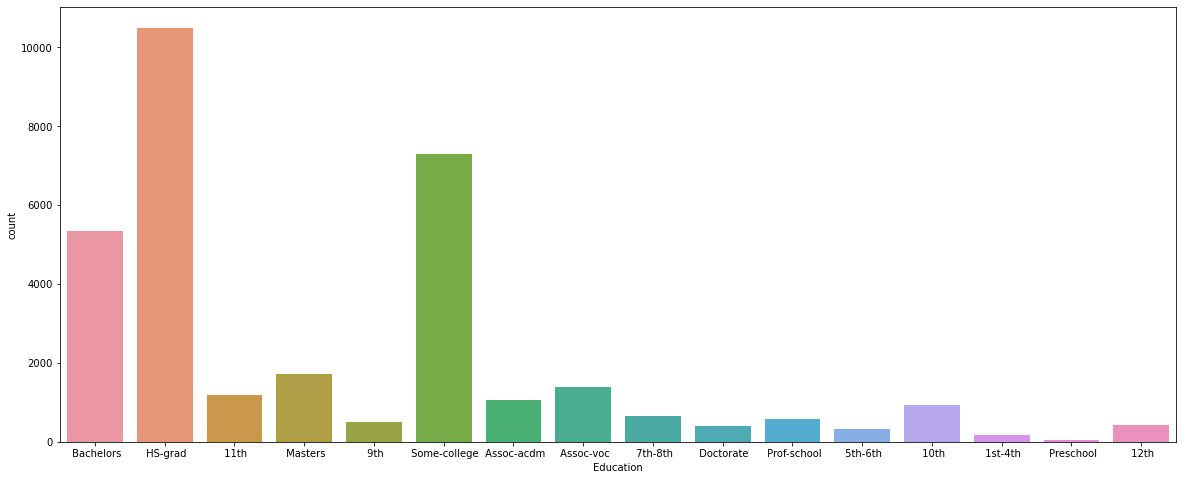

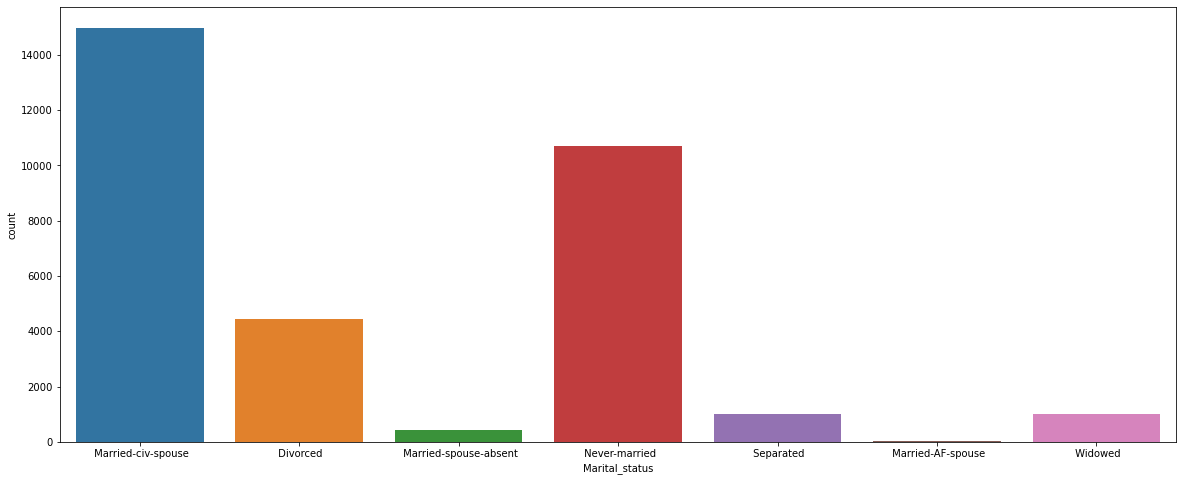

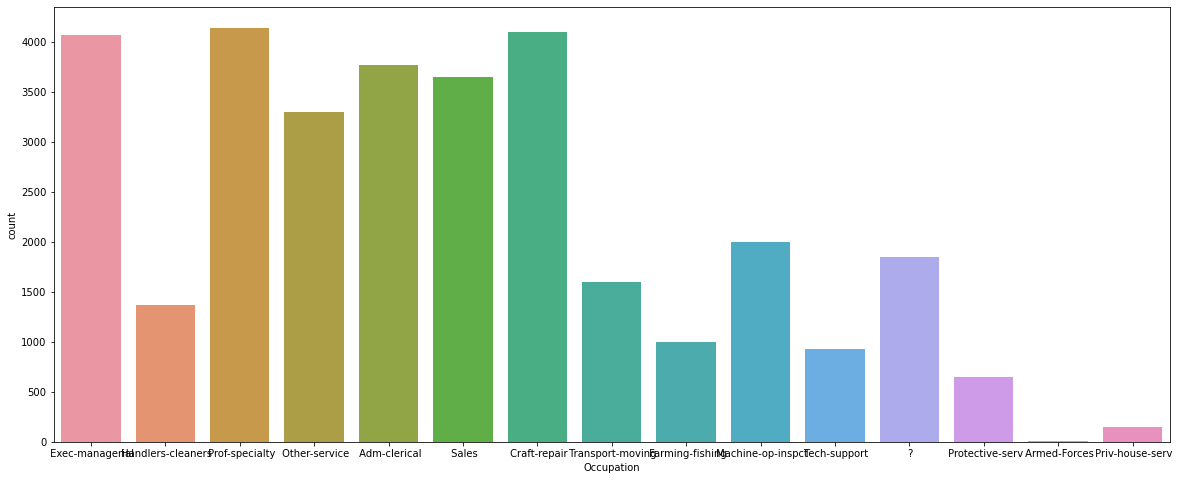

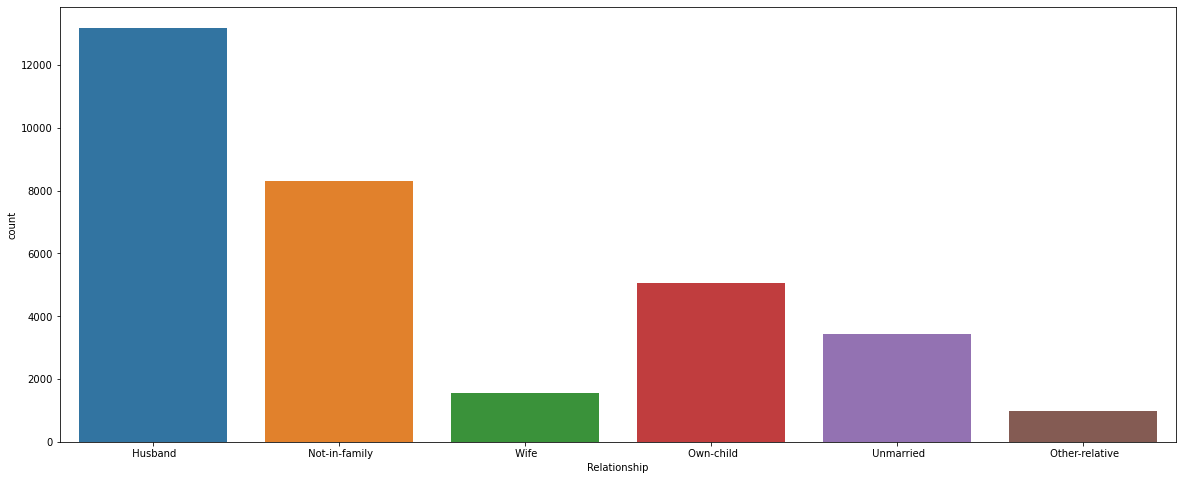

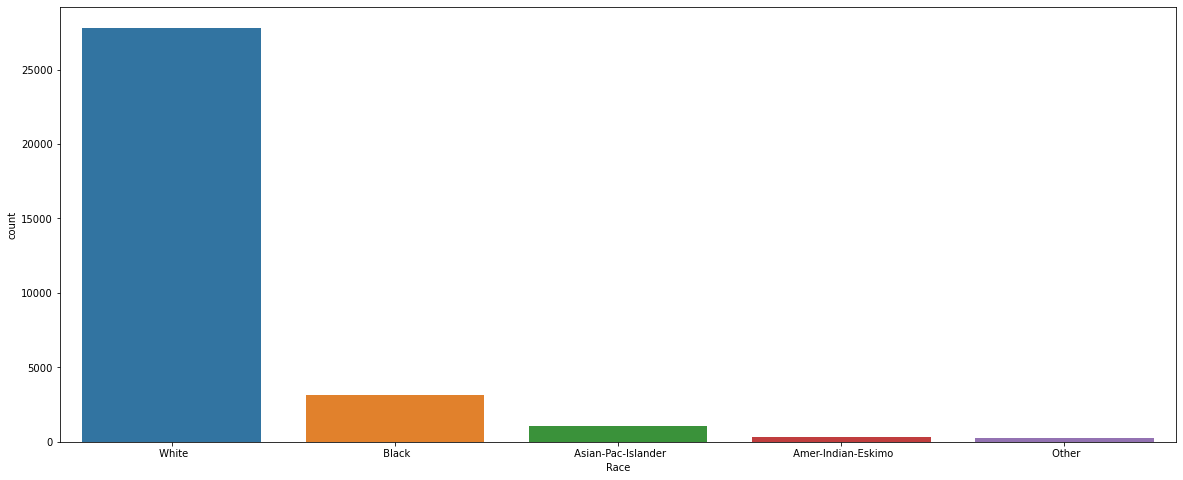

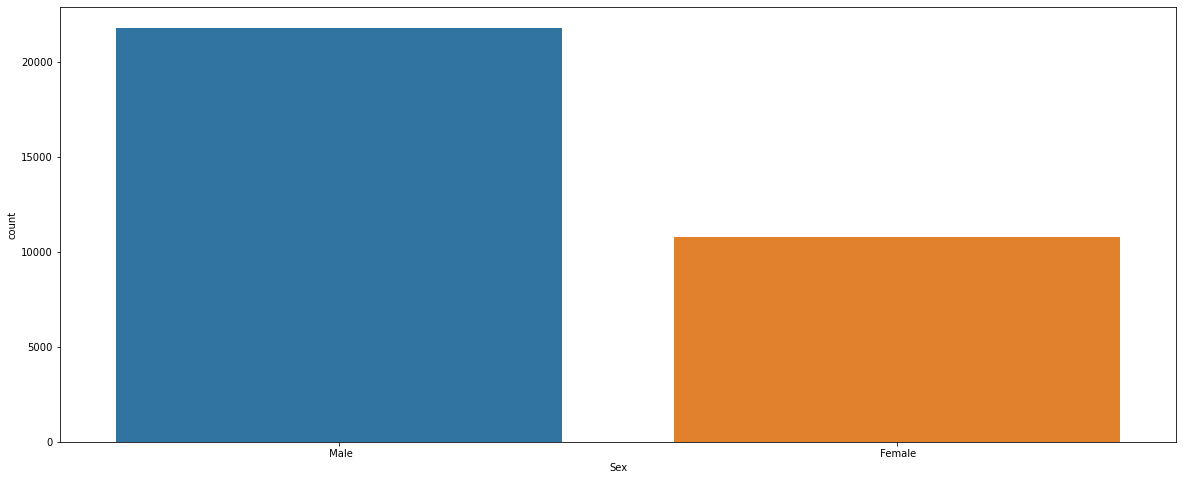

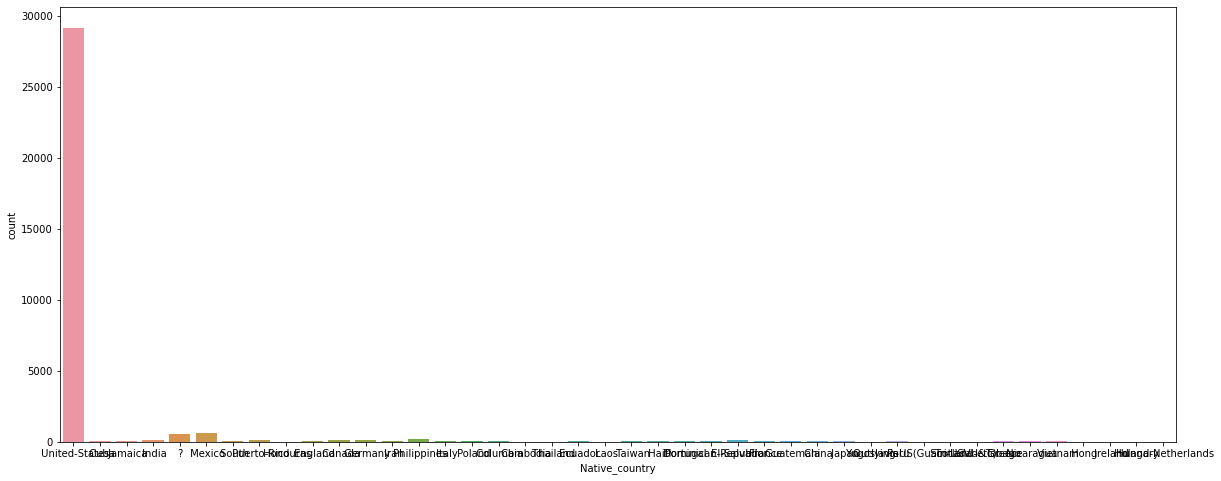

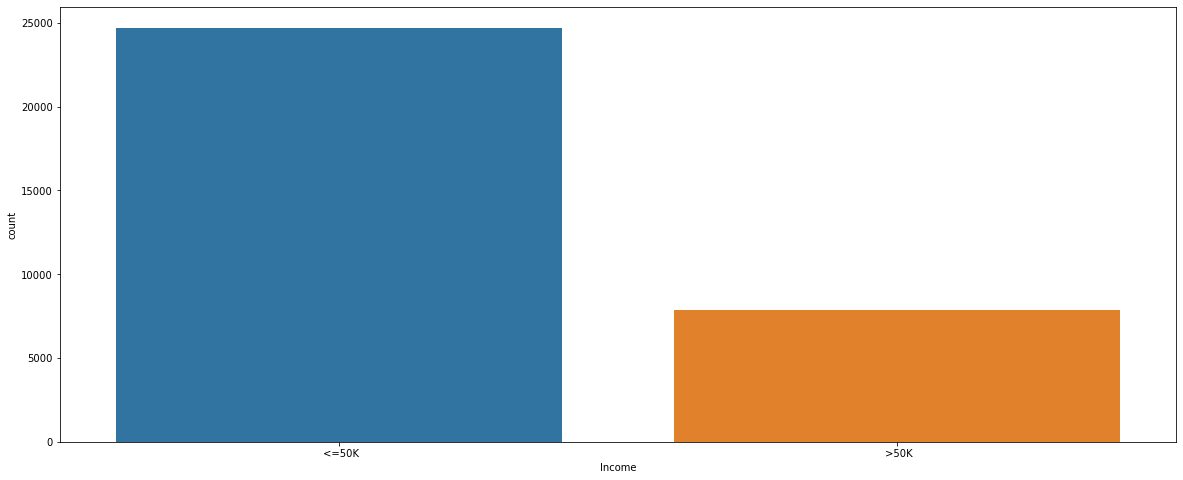

In [54]:
for i in categorical_data.columns:
    plt.figure(figsize=(20,8))
    sns.countplot(x=categorical_data[i],data=categorical_data)

In [55]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [56]:
for i in df.columns:
    df[i]=le.fit_transform(df[i])
    df

In [57]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,2925,9,12,2,4,0,4,1,0,0,12,39,0
1,21,4,14085,11,8,0,6,1,4,1,0,0,39,39,0
2,36,4,15335,1,6,2,6,0,2,1,0,0,39,39,0
3,11,4,19354,9,12,2,10,5,2,0,0,0,39,5,0
4,20,4,17699,12,13,2,4,5,4,0,0,0,39,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,10,4,16527,7,11,2,13,5,4,0,0,0,37,39,0
32556,23,4,8079,11,8,2,7,0,4,1,0,0,39,39,1
32557,41,4,7882,11,8,6,1,4,4,0,0,0,39,39,0
32558,5,4,12880,11,8,4,1,3,4,1,0,0,19,39,0


In [58]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003829,-0.078466,-0.010499,0.036547,-0.266433,-0.020929,-0.263783,0.028751,0.088863,0.125916,0.065058,0.069123,-0.001145,0.234136
Workclass,0.003829,1.000000,-0.018359,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.029297,0.015630,0.139553,-0.007710,0.051645
Fnlwgt,-0.078466,-0.018359,1.000000,-0.027082,-0.042806,0.030163,0.003417,0.007005,-0.008964,0.025787,-0.004562,-0.009912,-0.019168,-0.057038,-0.010573
Education,-0.010499,0.023537,-0.027082,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.031392,0.016111,0.056295,0.064291,0.079311
Education_num,0.036547,0.052015,-0.042806,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.154387,0.084175,0.150098,0.050831,0.335182
Marital_status,-0.266433,-0.064798,0.030163,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.075162,-0.035235,-0.192647,-0.023827,-0.199295
Occupation,-0.020929,0.255004,0.003417,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.026285,0.017334,0.080622,-0.012532,0.075448
Relationship,-0.263783,-0.090449,0.007005,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.093141,-0.064286,-0.251353,-0.005504,-0.250924
Race,0.028751,0.049720,-0.008964,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.024951,0.019366,0.042318,0.137849,0.071853
Sex,0.088863,0.095942,0.025787,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.077573,0.049549,0.231357,-0.008125,0.215995


<AxesSubplot:>

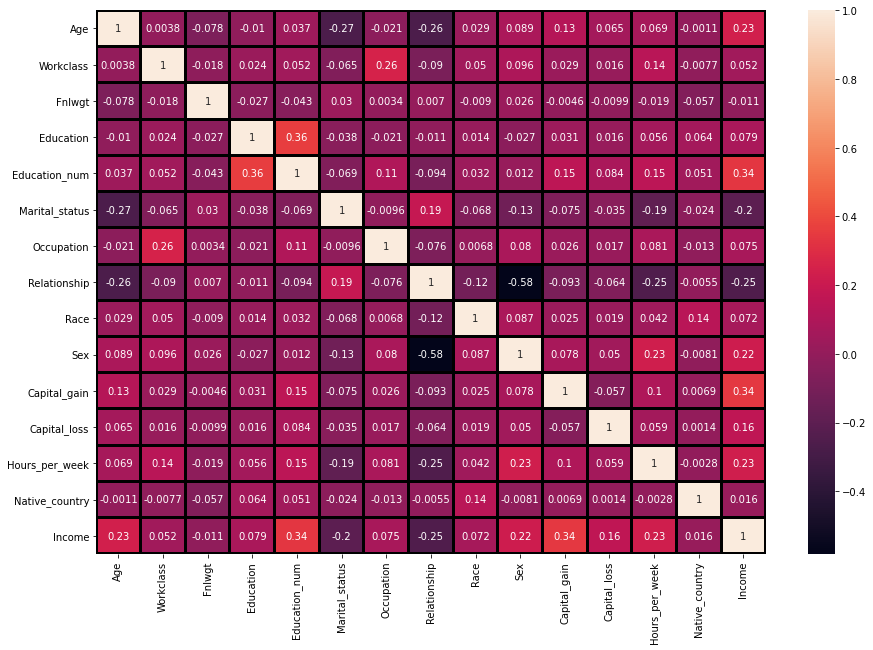

In [59]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidth=2.0,linecolor='black')

As per the corelation Age factor,Education_num,Capital_gain and Hours_per_week slightly affecting the dependent variable and Education and final weight not that much affective to dependent variable so we can delete the varaibles Education and Education_num are multi collinear so that is one of the reason to remove one variable



In [60]:
df=df.drop(['Education','Fnlwgt'],axis=1)

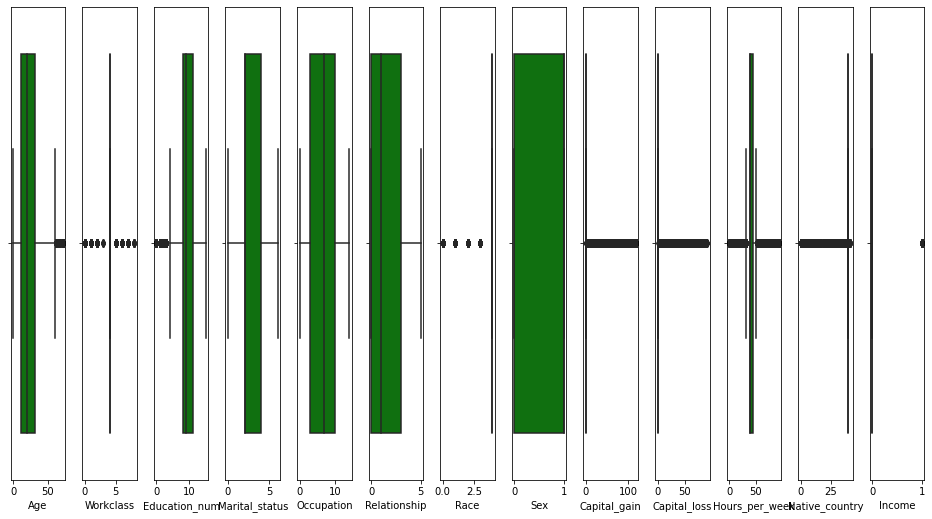

In [61]:
collist=df.columns.values
ncol=20
nrows=14
plt.figure(figsize=(ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [62]:
from scipy.stats import zscore
import numpy as np

In [63]:
z=np.abs(zscore(df))
z

array([[0.83749664, 1.46388339, 1.13477863, ..., 2.25444135, 0.29157343,
        0.5632099 ],
       [0.042559  , 0.09012148, 0.42002663, ..., 0.03112222, 0.29157343,
        0.5632099 ],
       [1.05751055, 0.09012148, 1.19742926, ..., 0.03112222, 0.29157343,
        0.5632099 ],
       ...,
       [1.42420039, 0.09012148, 0.42002663, ..., 0.03112222, 0.29157343,
        0.5632099 ],
       [1.21596651, 0.09012148, 0.42002663, ..., 1.67802528, 0.29157343,
        0.5632099 ],
       [0.98417258, 0.77700244, 0.42002663, ..., 0.03112222, 0.29157343,
        1.77553698]])

In [64]:
threshold=3
print(np.where(z>3))

(array([    3,     7,     8, ..., 32550, 32552, 32559], dtype=int64), array([11,  8,  8, ...,  6,  6,  8], dtype=int64))


In [65]:
df_new=df[(z<3) .all(axis=1)]
df_new

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,12,2,4,0,4,1,0,0,12,39,0
1,21,4,8,0,6,1,4,1,0,0,39,39,0
2,36,4,6,2,6,0,2,1,0,0,39,39,0
4,20,4,13,2,4,5,4,0,0,0,39,39,0
5,32,4,4,3,8,1,2,0,0,0,15,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,5,4,9,4,11,1,4,1,0,0,39,39,0
32555,10,4,11,2,13,5,4,0,0,0,37,39,0
32556,23,4,8,2,7,0,4,1,0,0,39,39,1
32557,41,4,8,6,1,4,4,0,0,0,39,39,0


In [66]:
print(df.shape)
print(df_new.shape)

(32560, 13)
(26735, 13)


In [67]:
loss_percent=(32560-26735)/32560*100
print(loss_percent)

17.89004914004914


In [68]:
x=df_new.drop('Income',axis=1)
y=df_new['Income']

In [69]:
y.value_counts()

0    21646
1     5089
Name: Income, dtype: int64

In [70]:
x.skew()

Age               0.512903
Workclass        -0.746686
Education_num    -0.150206
Marital_status   -0.086741
Occupation        0.136047
Relationship      0.709768
Race             -2.524414
Sex              -0.649131
Capital_gain      6.044493
Capital_loss      9.786982
Hours_per_week   -0.382335
Native_country   -5.338005
dtype: float64

Workclass,Relationship,Race,Sex,Capital_gain,Capital_loss,Native_country these are positively and negitively skewed.

<AxesSubplot:xlabel='Workclass', ylabel='Density'>

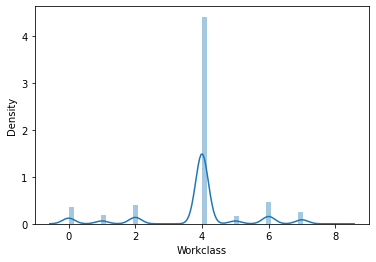

In [71]:
sns.distplot(df_new['Workclass'])

<AxesSubplot:xlabel='Relationship', ylabel='Density'>

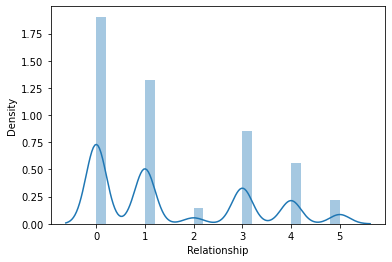

In [72]:
sns.distplot(df_new['Relationship'])

<AxesSubplot:xlabel='Race', ylabel='Density'>

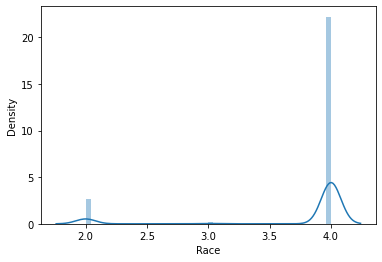

In [73]:
sns.distplot(df_new['Race'])

<AxesSubplot:xlabel='Sex', ylabel='Density'>

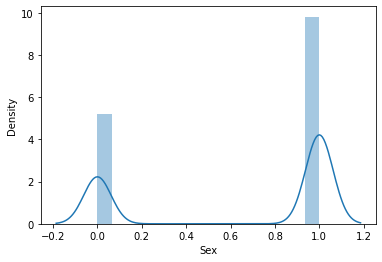

In [74]:
sns.distplot(df_new['Sex'])

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

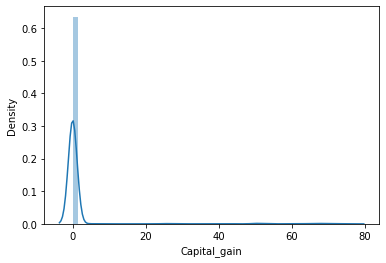

In [75]:
sns.distplot(df_new['Capital_gain'])

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

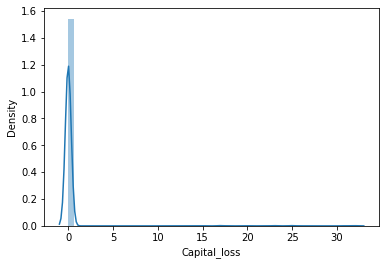

In [76]:
sns.distplot(df_new['Capital_loss'])

<AxesSubplot:xlabel='Native_country', ylabel='Density'>

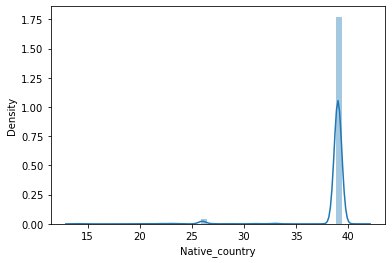

In [77]:
sns.distplot(df_new['Native_country'])

In [78]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method="yeo-johnson")

In [79]:
x

array([[ 0.93192742,  1.66091865,  1.29041427, ..., -0.11550725,
        -2.19297782,  0.17673997],
       [ 0.17805827,  0.02204012, -0.43193827, ..., -0.11550725,
        -0.01830135,  0.17673997],
       [ 1.09917956,  0.02204012, -1.24234908, ..., -0.11550725,
        -0.01830135,  0.17673997],
       ...,
       [ 0.31543197,  0.02204012, -0.43193827, ..., -0.11550725,
        -0.01830135,  0.17673997],
       [ 1.36405656,  0.02204012, -0.43193827, ..., -0.11550725,
        -0.01830135,  0.17673997],
       [-1.28036754,  0.02204012, -0.43193827, ..., -0.11550725,
        -1.70348545,  0.17673997]])

In [80]:
from sklearn.preprocessing import StandardScaler
sn=StandardScaler()
x=sn.fit_transform(x)
x

array([[ 0.93192742,  1.66091865,  1.29041427, ..., -0.11550725,
        -2.19297782,  0.17673997],
       [ 0.17805827,  0.02204012, -0.43193827, ..., -0.11550725,
        -0.01830135,  0.17673997],
       [ 1.09917956,  0.02204012, -1.24234908, ..., -0.11550725,
        -0.01830135,  0.17673997],
       ...,
       [ 0.31543197,  0.02204012, -0.43193827, ..., -0.11550725,
        -0.01830135,  0.17673997],
       [ 1.36405656,  0.02204012, -0.43193827, ..., -0.11550725,
        -0.01830135,  0.17673997],
       [-1.28036754,  0.02204012, -0.43193827, ..., -0.11550725,
        -1.70348545,  0.17673997]])

In [81]:
print(x.shape)
print(y.shape)

(26735, 12)
(26735,)


In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [83]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(21388, 12)
(21388,)
(5347, 12)
(5347,)


In [84]:
from imblearn.over_sampling import SMOTE

In [85]:
smt=SMOTE()
x_train, y_train = smt.fit_resample(x_train, y_train)

In [86]:
x_train

array([[-0.72038076,  0.02204012, -0.43193827, ..., -0.11550725,
        -0.01830135, -4.27361897],
       [-0.19438772,  0.02204012, -2.71735408, ..., -0.11550725,
        -0.01830135, -4.27361204],
       [ 0.93192742, -2.26927063, -0.43193827, ..., -0.11550725,
         1.44781638,  0.17673997],
       ...,
       [ 0.24746319,  0.02204012, -0.43193827, ..., -0.11550725,
        -0.01830135,  0.17673997],
       [ 1.15879808,  0.02204012,  1.73866218, ..., -0.11550725,
        -0.01830135,  0.17673997],
       [-0.18864036,  0.02204012,  1.29041427, ..., -0.11550725,
        -0.01830135,  0.17673997]])

In [87]:
y_train

0        0
1        0
2        1
3        0
4        0
        ..
34579    1
34580    1
34581    1
34582    1
34583    1
Name: Income, Length: 34584, dtype: int32

In [88]:
y_train.value_counts()

1    17292
0    17292
Name: Income, dtype: int64

In [89]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,f1_score

In [90]:
print(lm.fit(x_train,y_train))
print(lm.score(x_train,y_train))

LogisticRegression()
0.7588769373120519


In [91]:
pred=lm.predict(x_test)
print("predicted result score:",pred)
print("actual score:",y_test)

predicted result score: [0 0 1 ... 1 0 0]
actual score: 15066    0
23845    0
14179    1
30556    0
5692     0
        ..
29092    1
30576    0
5686     0
17916    0
11777    0
Name: Income, Length: 5347, dtype: int32


In [92]:
print("Accuracy_score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('F1 score',f1_score(y_test,pred,average='micro'))

Accuracy_score: 0.7409762483635683
[[3175 1179]
 [ 206  787]]
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      4354
           1       0.40      0.79      0.53       993

    accuracy                           0.74      5347
   macro avg       0.67      0.76      0.68      5347
weighted avg       0.84      0.74      0.77      5347

F1 score 0.7409762483635682


# Hyper tuning for Logistic Classifier

In [93]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lm_cv=GridSearchCV(lm,grid,cv=10)
lm_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",lm_cv.best_params_)
print("accuracy :",lm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.7607270979503599


In [94]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [95]:
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [96]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print(f.score(x_train,y_train))
    print('Accuracy::',accuracy_score(y_test,pred))
    print('confusion matrix\n',confusion_matrix(y_test,pred)) 
    print('classification report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred,average='micro'))

In [97]:
fun(svc)

0.8280996992829054
Accuracy:: 0.7755750888348607
confusion matrix
 [[3304 1050]
 [ 150  843]]
classification report
               precision    recall  f1-score   support

           0       0.96      0.76      0.85      4354
           1       0.45      0.85      0.58       993

    accuracy                           0.78      5347
   macro avg       0.70      0.80      0.72      5347
weighted avg       0.86      0.78      0.80      5347

F1 score 0.7755750888348606


In [98]:
fun(dtc)

0.9821304649548924
Accuracy:: 0.8006358705816345
confusion matrix
 [[3812  542]
 [ 524  469]]
classification report
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      4354
           1       0.46      0.47      0.47       993

    accuracy                           0.80      5347
   macro avg       0.67      0.67      0.67      5347
weighted avg       0.80      0.80      0.80      5347

F1 score 0.8006358705816347


In [99]:
fun(knn)

0.8981609993060374
Accuracy:: 0.7881054797082476
confusion matrix
 [[3504  850]
 [ 283  710]]
classification report
               precision    recall  f1-score   support

           0       0.93      0.80      0.86      4354
           1       0.46      0.72      0.56       993

    accuracy                           0.79      5347
   macro avg       0.69      0.76      0.71      5347
weighted avg       0.84      0.79      0.80      5347

F1 score 0.7881054797082476


In [100]:
from sklearn.model_selection import GridSearchCV
params = {"criterion":['gini','entropy'],"splitter":['best','random'],"max_features":['auto', 'sqrt', 'log2']}
grid_search_cv = GridSearchCV(dtc,param_grid=params)
grid_search_cv.fit(x,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)

{'criterion': 'entropy', 'max_features': 'log2', 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_features='log2')
0.8083785300168319


In [101]:
params={'kernel':['linear','rbf','poly','sigmoid']}
grid_search_cv = GridSearchCV(svc,param_grid=params,cv=10,verbose=1,n_jobs=-1)
grid_search_cv.fit(x,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
{'kernel': 'rbf'}
SVC()
0.8466432937927995


In [102]:
from sklearn.model_selection import GridSearchCV
params = {"n_neighbors":[7,5,11],"weights":['uniform','distance'],"algorithm":['auto', 'brute']}
grid_search_cv = GridSearchCV(knn,param_grid=params)
grid_search_cv.fit(x,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)

{'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=11)
0.8457452777258275


In [103]:
# Random Forest CLassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier

In [104]:
rf=RandomForestClassifier(n_estimators=100,random_state=4)
ad=AdaBoostClassifier()

In [105]:
fun(ad)

0.8421235253296322
Accuracy:: 0.8126051991771086
confusion matrix
 [[3549  805]
 [ 197  796]]
classification report
               precision    recall  f1-score   support

           0       0.95      0.82      0.88      4354
           1       0.50      0.80      0.61       993

    accuracy                           0.81      5347
   macro avg       0.72      0.81      0.75      5347
weighted avg       0.86      0.81      0.83      5347

F1 score 0.8126051991771085


In [106]:
fun(rf)

0.9821015498496415
Accuracy:: 0.8281279221993642
confusion matrix
 [[3907  447]
 [ 472  521]]
classification report
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      4354
           1       0.54      0.52      0.53       993

    accuracy                           0.83      5347
   macro avg       0.72      0.71      0.71      5347
weighted avg       0.83      0.83      0.83      5347

F1 score 0.8281279221993642


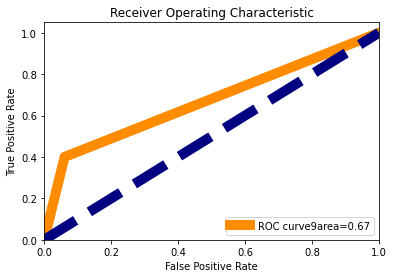

In [107]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve9area=%0.2f' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [108]:
#cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [109]:
for i in range(2,10):
    score=cross_val_score(lm,x,y,cv=i)
    print('At Value of',i,score.mean())

At Value of 2 0.8371423085792753
At Value of 3 0.8369553603454495
At Value of 4 0.8369926915144072
At Value of 5 0.8369927061903871
At Value of 6 0.837067437793051
At Value of 7 0.8371050114933344
At Value of 8 0.8369924666982279
At Value of 9 0.8371796804198913


In [110]:
score=cross_val_score(lm,x,y,cv=10)
score.mean()

0.837104877971661

In [111]:
score=cross_val_score(dtc,x,y,cv=10)
score.mean()

0.8035538912211397

In [112]:
score=cross_val_score(svc,x,y,cv=10)
score.mean()

0.8466432937927995

In [113]:
score=cross_val_score(rf,x,y,cv=10)
score.mean()

0.8375914047816316

In [114]:
score=cross_val_score(ad,x,y,cv=10)
score.mean()

0.8532268164903417

As per the test score,Accuracy,f1_score and cv value random forest is giving the good result.

# Saving Model On Accuracy Score and cross validation score

In [115]:
import pickle
filename='Poweplant_Primary_Fuel _Prediction.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [116]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=rf.predict(x_test)

print(res)

       Actual  Predict
15066       0        0
23845       0        0
14179       1        0
30556       0        0
5692        0        0
...       ...      ...
29092       1        1
30576       0        0
5686        0        0
17916       0        0
11777       0        0

[5347 rows x 2 columns]
